# Main steps for building an index:

![Sort-Based-Index](img/index_flow.png)

# Tokenization

In [1]:
from nltk.tokenize import PunktSentenceTokenizer
sent_tokenizer = PunktSentenceTokenizer()

example_document = """
Hurricane-force winds have struck central and northern Portugal, leaving 300,000 homes without power.

The remnants of Hurricane Leslie swept in overnight on Saturday, with winds gusting up to 176km/h (109mph).

Civil defence officials said 27 people suffered minor injuries, with localised flooding, hundreds of trees uprooted and a number of flights cancelled.

The storm, one of the most powerful to ever hit the country, is now passing over northern Spain.
"""
sentences = sent_tokenizer.tokenize(example_document)
sentences

['\nHurricane-force winds have struck central and northern Portugal, leaving 300,000 homes without power.',
 'The remnants of Hurricane Leslie swept in overnight on Saturday, with winds gusting up to 176km/h (109mph).',
 'Civil defence officials said 27 people suffered minor injuries, with localised flooding, hundreds of trees uprooted and a number of flights cancelled.',
 'The storm, one of the most powerful to ever hit the country, is now passing over northern Spain.']

In [2]:
from nltk.tokenize import TweetTokenizer, WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
tweet_tok, whsp_tok, wordpunct_tok, treebank_tok = TweetTokenizer(), WhitespaceTokenizer(), WordPunctTokenizer(), TreebankWordTokenizer()

print("Whitespace tokenizer:")
print(whsp_tok.tokenize(sentences[0]))

print("\nWord Punctuation Tokenizer:")
print(wordpunct_tok.tokenize(sentences[2]))
print(wordpunct_tok.tokenize('On a $50,000 mortgage of 30 years at 8 percent, the monthly payment would be $366.88.'))

print("\nTree bank tokenizer:")
print(treebank_tok.tokenize('On a $50,000 mortgage of 30 years at 8 percent, the monthly payment would be $366.88.'))
print(treebank_tok.tokenize('My email is admin@sth.com'))

print("\nTweeter Tokenizer:")
print(tweet_tok.tokenize('My email is admin@sth.com'))
print(tweet_tok.tokenize('Last sunny day before winter :) #sunisenergy'))
print(tweet_tok.tokenize('Here is my ip address 192.33.24.45')) # we might want to fix this
print(tweet_tok.tokenize("I can't stop singing that song!")) # we might want to split can't in can, 't instead
print(tweet_tok.tokenize(sentences[1])) # maybe we want to keep  km/h together apart from 176?
print(tweet_tok.tokenize('Eugenia e Jack sposi e innamorati (ma la magia di Harry e Meghan non c’è)')) # maybe we want language specific tokenizers

Whitespace tokenizer:
['Hurricane-force', 'winds', 'have', 'struck', 'central', 'and', 'northern', 'Portugal,', 'leaving', '300,000', 'homes', 'without', 'power.']

Word Punctuation Tokenizer:
['Civil', 'defence', 'officials', 'said', '27', 'people', 'suffered', 'minor', 'injuries', ',', 'with', 'localised', 'flooding', ',', 'hundreds', 'of', 'trees', 'uprooted', 'and', 'a', 'number', 'of', 'flights', 'cancelled', '.']
['On', 'a', '$', '50', ',', '000', 'mortgage', 'of', '30', 'years', 'at', '8', 'percent', ',', 'the', 'monthly', 'payment', 'would', 'be', '$', '366', '.', '88', '.']

Tree bank tokenizer:
['On', 'a', '$', '50,000', 'mortgage', 'of', '30', 'years', 'at', '8', 'percent', ',', 'the', 'monthly', 'payment', 'would', 'be', '$', '366.88', '.']
['My', 'email', 'is', 'admin', '@', 'sth.com']

Tweeter Tokenizer:
['My', 'email', 'is', 'admin@sth.com']
['Last', 'sunny', 'day', 'before', 'winter', ':)', '#sunisenergy']
['Here', 'is', 'my', 'ip', 'address', '192.33', '.', '24.45']
['

## Exercise: play with the tokenizers and find more vulnerabilities

# Normalization

Depending on the domain and the task at hand, we would like to make text normalization. Some examples of text normalizing steps can include:
- Whole chunks of the document might be irrelevant, e.g. html tags.
- __Numbers__ - we can remove them or replace them with a common token.
- We can do the same for all other token types we don't care about, e.g. URLs, @ mentions, 😀, etc.
- We can __lower-case__ all words or even use a tool to upper-case all named entities like geographic names.
- We might want to add __equivalence classes__ for matching synonyms, abbreviations, etc.
- Remove __stopwords__ - the list of stopwords is usually manually curated
- Google N-Grams - a huge corpus of statistics, showing frequency of word n-grams in web pages. It contains statistics for many languages and can be used to further examine frequently used words. 
- __Stemming__ - crude removal of prefixes and suffixes to reduce the word form to match words like car-sharing
- __Lemmatiazation__ - replacing the word by its lemma

__Exercise__: Find examples when we wouldn't like to normalize text with each of the proposed methods.

In [3]:
import nltk 
nltk.download('wordnet')

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
tokens = tweet_tok.tokenize('Car sharing will bring a whole new era to the automobile industry. Eventually, it may even decreas air pollutions.')
for token in tokens:
    print(token, lemmatizer.lemmatize(token), stemmer.stem(token))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pgencheva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Car Car car
sharing sharing share
will will will
bring bring bring
a a a
whole whole whole
new new new
era era era
to to to
the the the
automobile automobile automobil
industry industry industri
. . .
Eventually Eventually eventu
, , ,
it it it
may may may
even even even
decreas decreas decrea
air air air
pollutions pollution pollut
. . .


In [4]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pgencheva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why

## Exercise: explore the dataset from 20 news groups and create another preprocessing method, which will clean the text of the news articles:
- Select one of the tokenizers or try to write one of your own
- Clean the headings and any common parts
- Lowercase the text and see if you might want to remove any token types (e.g. URLs, you might also want to split URLs to meaningful words and use them as tokens)
- Explore the most frequent words in the corpus and add more stop-words (depending on your tokenizer you might also need to modify the stopwords, too). Then, remove them from the text.
- Have a method variable for choosing lemmatization or stemming
- Finally compare how all the steps reduced/modified the index.


You will also have to include all the steps for the query words in your query methods, too!
- Explore how the quering results changed in both positive and negative ways.

## Some ways to observe how the corpus changes using the different pre-processing techniques:

In [5]:
from nltk.tokenize import sent_tokenize, TweetTokenizer
from string import punctuation
from os import scandir
tokenizer = TweetTokenizer()

def tokenize_documents(path):
    """
    Returns a list of tokens for a document's content. 
    Tokens should not contain punctuation and should be lower-cased.
    """
    tokenized_documents = []
    for doc_f in scandir(path):
        if not doc_f.is_file():
            continue
        content = open(doc_f).read()
        sentences = sent_tokenize(content)
        tokens = []
        for _sent in sentences:
            sent_tokens = tokenizer.tokenize(_sent)
            sent_tokens = [_tok.lower() for _tok in sent_tokens if _tok not in punctuation]
            tokens += sent_tokens
        tokenized_documents.append(tokens)
    return tokenized_documents

In [6]:
# pip3 install pandas
# pip3 install matplotlib
from collections import Counter
from pandas import DataFrame
import matplotlib.pyplot as plt

print(">>>>>>Observing how the most frequent tokens change:")
# normal list of words
word_freqs = Counter(sum(tokenize_documents('data/mini_newsgroups/sci.crypt/'), []))
df = DataFrame(list(word_freqs.items()), columns=['text', 'freq'])
df.sort_values(['freq'], inplace=True, ascending=False)
print(">>>>>Original Tokens:")
print(df.head())

# remove stopwords
en_stopwords = set(stopwords.words('english'))
df_no_stopwords = df.copy()
df_no_stopwords = df_no_stopwords[~df_no_stopwords['text'].isin(en_stopwords)]
print(">>>>>>Removed stopwords:")
print(df_no_stopwords.head())

# stem words
stem = stemmer.stem
df_no_stopwords['stemmed'] = df_no_stopwords['text'].apply(stem)
print(">>>>>>Applied stemming:")
print(df_no_stopwords.tail())

# merge same stems into one row
stemmed_freqs = df_no_stopwords.groupby(['stemmed'])['freq'].sum()
stemmed_freqs.sort_values(inplace=True, ascending=False)
print(">>>>>>Merge same stemmed tokens into one:")
print(stemmed_freqs.head())

>>>>>>Observing how the most frequent tokens change:
>>>>>Original Tokens:
    text  freq
84   the  1718
201   to   831
33    of   711
56     a   563
198  and   506
>>>>>>Removed stopwords:
                          text  freq
1                    sci.crypt   158
3    cantaloupe.srv.cs.cmu.edu   150
176                 encryption   148
287                        key   133
143                    clipper   115
>>>>>>Applied stemming:
           text  freq stemmed
3071        tal     1     tal
3072       kubo     1    kubo
3086  plurality     1  plural
3087    supreme     1  suprem
5768     piqued     1    piqu
>>>>>>Merge same stemmed tokens into one:
stemmed
key                          198
encrypt                      187
use                          185
sci.crypt                    158
cantaloupe.srv.cs.cmu.edu    150
Name: freq, dtype: int64


>>>>Observe the frequency of the top tokens in each dataframe


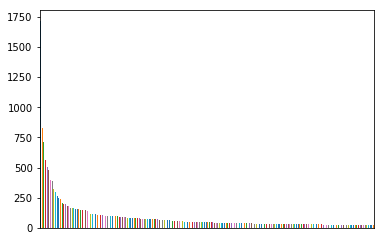

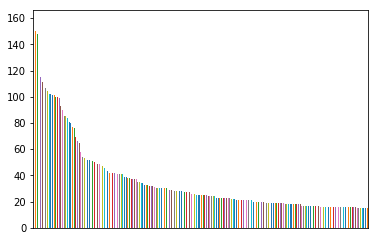

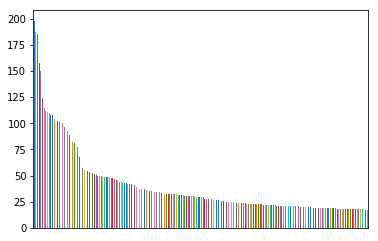

In [7]:
def _plot_no_xticks():
    plt.gca().get_xaxis().set_visible(False)
    plt.show()
    plt.close()
    
print(">>>>Observe the frequency of the top tokens in each dataframe")
top_tokens = 200
df['freq'][:top_tokens].plot(kind='bar')
_plot_no_xticks()

df_no_stopwords['freq'][:top_tokens].plot(kind='bar')
_plot_no_xticks()

stemmed_freqs[:top_tokens].plot(kind='bar')
_plot_no_xticks()